# Smart scanning
This Jupyter is to simulate different operations of a smart scanner.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from smart_scan.helpers.function_helpers import mask2active_pixels, generate_mask, pixel2voltage, output_voltages
import ipywidgets as widgets

In [2]:
from PIL import Image
im = Image.open('resources/mask.tif')

imarray = np.array(im)

In [3]:
# Pseudo-code

# 1: define the image and mask sizes
semidim_w = 1 # pixels
semidim_h = 7 # pixels

# 2: generate a binary mask to know where we want to scan
# h = 100 # pixels
# w = 100 # pixels
#mask = generate_mask(h,w, semidim_h, semidim_w)

# 2b load a mask
mask = imarray
h = mask.shape[0]
w = mask.shape[1]

# 3: convert the mask to active pixels, so be sent to the controller
pixel_sequence = mask2active_pixels(mask)

# 4: convert the pixels in voltages
# Calibration parameters:
a_w = 20
a_h = 20
m_w = 1
m_h = 1

voltage_sequence = pixel2voltage(pixel_sequence = pixel_sequence, m_w = m_w, m_h = m_h, a_w = a_w, a_h = a_h)


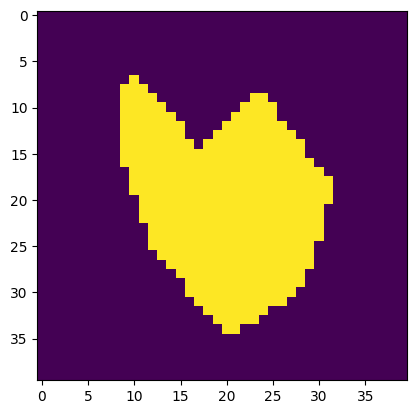

In [4]:
plt.imshow(mask)

In [5]:
tmp_mask = np.zeros([h,w,len(pixel_sequence)])
for idx, pixel in enumerate(pixel_sequence):
    tmp_mask[pixel[0],pixel[1],idx] = 1
    
# Threshold and show the image
slice = widgets.IntSlider(description='slice',min = 0, max = len(pixel_sequence)-1)

def show_scan(slice):
    data = tmp_mask[:,:,slice]
    fig = plt.imshow(data)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

def show_voltage(slice):
    print(f'Voltage_x: {voltage_sequence[slice][1]}')
    print(f'Voltage_y: {voltage_sequence[slice][0]}')
    

    
scan = widgets.interactive_output(show_scan, {'slice': slice})
voltage = widgets.interactive_output(show_voltage, {'slice': slice})
widgets.HBox([ widgets.VBox([slice, scan]), voltage ]) 


In [6]:
duration = 1 #s?

#calculated properties
rate = 1/duration

# AnalogOut expects double normalized to +/-1 value
data_x = np.transpose(voltage_sequence)[0]
data_x=(data_x-min(data_x))
data_x = data_x/max(data_x)*0.1


data_y = np.transpose(voltage_sequence)[1]
data_y=(data_y-min(data_y))
data_y = data_y/max(data_y)*0.1

# Drive the device
output_voltages(data_x, data_y, rate)
# x = np.array([0])
# y = np.array([0])
# output_voltages(x,y, rate)


Failed to open device
b'No connected device found\nFDwfDeviceOpenEx\n'


NameError: name 'quit' is not defined

### Let's try to do the same, but using the new class structure

In [9]:
from smart_scan.devices import Galvo_Scanners
gs = Galvo_Scanners()

In [10]:
gs.connect()


In [11]:
gs.scan(data_x, data_y, rate)

In [13]:
gs.disconnect()